In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
from keras.layers import Input
from keras.models import Model
from skimage import data

In [2]:
from keras_pyramid_pooling_module import PyramidPoolingModule

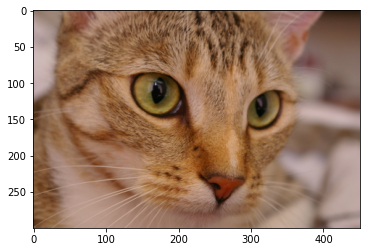

In [3]:
img = data.chelsea() / 255.0
plt.imshow(img)

In [4]:
K.clear_session()
input_ = Input(img.shape)
x = PyramidPoolingModule()(input_)
model = Model(inputs=input_, outputs=x)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 451, 3)]     0         
_________________________________________________________________
pyramid_pooling_module (Pyra (None, 300, 451, 7)       12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [6]:
out = model.predict(img[None, ...])[0]

# Outputs

## unmodified input

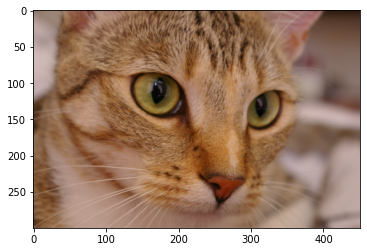

In [7]:
plt.imshow(out[..., :3])

## pyramid outputs

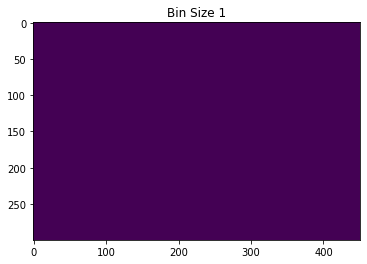

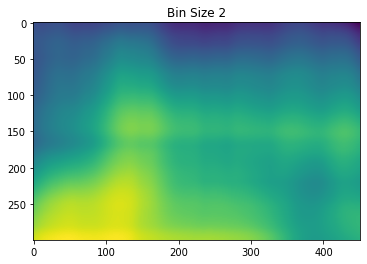

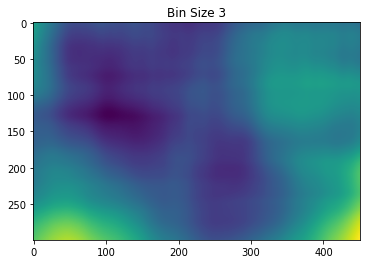

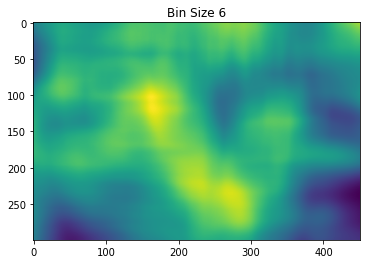

In [8]:
for (i, bin_size) in enumerate([1, 2, 3, 6]):
    plt.imshow(out[..., i + 3])
    plt.title(f'Bin Size {bin_size}')
    plt.show()